라이브러리

In [17]:
import os
import glob
import librosa
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



GPU

In [18]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

특징 추출 확인

In [ ]:
max_pad_len = 174

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        return None
    
    return mfccs

extract_feature('./audio/fold1/7061-6-0-0.wav') #테스트할 음향 파일 위치

전체 음향 파일을 대상으로 추출

In [20]:
fulldatasetpath = 'audio/'
metadata = pd.read_csv('./metadata/UrbanSound8K.csv')
features = []

for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),
                'fold'+str(row["fold"])+'/', str(row["slice_file_name"]))
    
    
    class_label = row["classID"]
    data = extract_feature(file_name)
    
    features.append([data, class_label]) 
#최초 추출한 데이터는 data이고 class_label과 합쳐져서 features에 저장


featuresdf = pd.DataFrame(features, columns=['feature', 'class_label'])

(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-10-9.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-11-0.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-11-2.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-12-2.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-14-1.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-14-5.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-14-6.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-15-1.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-15-3.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/104998-7-15-5.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSoun

c:\Anaconda\envs\home\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-1.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-10.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-11.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-17.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-2.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold7/173891-9-0-7.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/173993-3-0-25.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/173993-3-0-39.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/173993-3-0-51.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold5/173993-3-0-52.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K

c:\Anaconda\envs\home\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Anaconda\envs\home\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-0-0.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-0-1.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-0-2.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-0-3.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-1-0.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold10/88121-8-2-0.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold1/88466-7-0-0.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold3/88569-2-0-14.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold3/88569-2-0-21.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\fold3/88569-2-0-36.wav
(40, 174)
file name : c:\Users\오태호\Desktop\vad_sTT\UrbanSound8K\audio\f

피클이라는 데이터 형태로 저장

In [21]:
# 피클로 데이터 저장
featuresdf.to_pickle("featuresdf.pkl")

# 피클 데이터 로드
featuresdf = pd.read_pickle("featuresdf.pkl")

훈련,검증 셋

In [22]:
from keras.utils import to_categorical

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

훈련, 데이터셋 형태 변환

In [23]:
n_columns = 174    
n_row = 40       
n_channels = 1
n_classes = 10

# input shape 조정

# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])
    

딥러닝 모델 작성

In [24]:
model = keras.Sequential()

model.add(layers.Conv2D(input_shape=(n_row, n_columns, n_channels), filters=16, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=32, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(kernel_size=2, filters=64, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(kernel_size=2, filters=128, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.2))

model.add(layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 39, 173, 16)       80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 86, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 19, 86, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 85, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 9, 42, 32)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 9, 42, 32)        

훈련시키기

In [25]:
training_epochs = 72
num_batch_size = 128

learning_rate = 0.001
opt = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=training_epochs)


Epoch 1/72
55/55 [==============================] - 11s 194ms/step - loss: 3.8962 - accuracy: 0.2096
Epoch 2/72
55/55 [==============================] - 11s 192ms/step - loss: 1.7343 - accuracy: 0.3877
Epoch 3/72
55/55 [==============================] - 11s 192ms/step - loss: 1.4693 - accuracy: 0.4797
Epoch 4/72
55/55 [==============================] - 10s 190ms/step - loss: 1.3349 - accuracy: 0.5310
Epoch 5/72
55/55 [==============================] - 11s 196ms/step - loss: 1.2179 - accuracy: 0.5728
Epoch 6/72
55/55 [==============================] - 11s 195ms/step - loss: 1.1179 - accuracy: 0.6110
Epoch 7/72
55/55 [==============================] - 10s 189ms/step - loss: 1.0599 - accuracy: 0.6346
Epoch 8/72
55/55 [==============================] - 11s 192ms/step - loss: 0.9978 - accuracy: 0.6591
Epoch 9/72
55/55 [==============================] - 10s 191ms/step - loss: 0.9538 - accuracy: 0.6714
Epoch 10/72
55/55 [==============================] - 10s 191ms/step - loss: 0.8954 - accura

훈련 histroy 그리기

KeyError: 'val_loss'

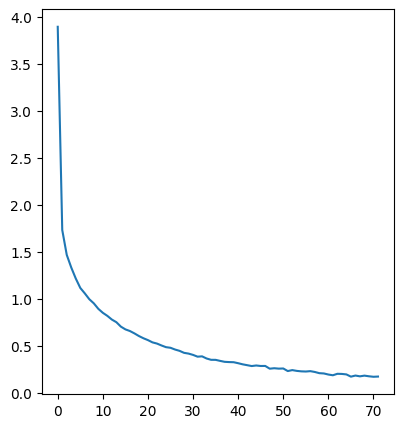

In [26]:
import matplotlib.pyplot as plt

def plot_history(history):
    key_value = ['loss', 'accuracy']
    
    # 시각화 함수 정의
    def vis(history, key):
        plt.plot(history.history[key])
        plt.plot(history.history['val_' + key])
        plt.title('Model ' + key)
        plt.ylabel(key)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')

    # 그래프 그리기
    plt.figure(figsize=(10, 5))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    
    plt.tight_layout()
    plt.show()

# history 객체를 이용한 학습 결과 시각화
plot_history(history)


모델 검증

In [ ]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

모델 저장

In [14]:
import os

# 저장 경로 설정
save_dir = "C:/Users/오태호/Desktop/vad_sTT/UrbanSound8K/sound_classifier_model.h5"

# 상위 디렉토리가 존재하지 않으면 생성
base_dir = os.path.dirname(save_dir)
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# 모델 저장
model.save(save_dir)


Else

In [ ]:
# GPU 메모리 해제가 안될 때
from numba import cuda 
device = cuda.get_current_device()
device.reset()

# 모델 삭제
#del model